# This notebook needs to retrieve the data of the games. The final result is: "valid_responses.p" that is a vector that contains all the dictionaries of the valid games. "Valid" means that the "success" is True, and they have at least:
  - 'type'=="game"
  - "short_description" as a key in the response
  - "publishers" as a key in the response
  - "categories" as a key in the response
  - "genres" as a key in the response

# Then, a bit of analysis is performed on the distributions of genres and categories, as the links will be based on those. As a starting point, I would start with one genre and one category in common.

In [ ]:
import urllib.request
import pandas as pd
import json
import numpy as np
import networkx as nx
import time
import pickle
import matplotlib.pyplot as plt


In [ ]:
steam_key = "867F8B5F0D8556E26387B363DEA1E027"
baseurl = "http://api.steampowered.com/ISteamApps/GetAppList/v0002/?key="
format ="&format=json"

In [ ]:
#build the request for obtaining the appid and name of all the app
all_app_req = "{}{}{}".format(baseurl, steam_key,format)
print(all_app_req)

http://api.steampowered.com/ISteamApps/GetAppList/v0002/?key=867F8B5F0D8556E26387B363DEA1E027&format=json


In [ ]:
#do the request and save the response
steamresponse = urllib.request.urlopen(all_app_req)
steamdata = steamresponse.read()
steamtext = steamdata.decode('utf-8')

In [ ]:
#save the response in a json document, then parse it to obtain the list {appid:###,name:"name"}
content = json.loads(steamtext)['applist']['apps']
#key = next( iter(content) )

In [ ]:
#with open('/content/drive/My Drive/Colab Notebooks/SG/final project/mystuff/All_games.p', 'wb') as fp:
#        pickle.dump(content, fp)

with open ('/content/drive/My Drive/Colab Notebooks/SG/final project/mystuff/All_games.p', 'rb') as fp:
    content = pickle.load(fp)

In [ ]:
#retrieve 5k most used with panda
most_used = pd.read_csv(r'/content/drive/My Drive/Colab Notebooks/SG/final project/5k_most_popular.csv')
most_used[["position","name"]]

position                              name
0          1.0  Counter-Strike: Global Offensive
1          2.0                            Dota 2
2          3.0     PLAYERUNKNOWN'S BATTLEGROUNDS
3          4.0                          Among Us
4          5.0                Grand Theft Auto V
...        ...                               ...
4618    4619.0                        Mad Driver
4619    4620.0                            HoPiKo
4620    4621.0                          OutSplit
4621    4622.0             Project First Contact
4622    4623.0             Escape From Nazi Labs

[4623 rows x 2 columns]

In [ ]:
#all games by panda
all_games = pd.DataFrame(content)

In [ ]:
all_games

appid                                              name
0       1118314                                                  
1        584220                                       RunningDead
2        584240               Rainbow Six Siege - Bandit Football
3        584250  Fantasy Grounds - Demons and Devils (Token Pack)
4        584260              Command LIVE - Korean Missile Crisis
...         ...                                               ...
105787  1397630                                       Crush Depth
105788  1339240                                   Serin Fate Demo
105789  1454360                             Super Star Shooter 16
105790   703080                                        Planet Zoo
105791  1269230                                   Dodo Adventures

[105792 rows x 2 columns]

In [ ]:
#merge all games and most used to obtain the 5k most used games with names and appid
id_most_used = pd.merge(most_used, all_games)
id_most_used.sort_values(by=['position'])

position                              name  ... all_time_peak   appid
0          1.0  Counter-Strike: Global Offensive  ...     1,308,963     730
1          2.0                            Dota 2  ...     1,295,114     570
2          3.0     PLAYERUNKNOWN'S BATTLEGROUNDS  ...     3,257,248  578080
3          4.0                          Among Us  ...       447,476  945360
4          5.0                Grand Theft Auto V  ...       364,548  362003
...        ...                               ...  ...           ...     ...
4266    4614.0                     All Alone: VR  ...         1,005  604830
4267    4615.0                            Pester  ...         1,004  354920
4268    4616.0                        Tribloos 2  ...         1,004  271550
4269    4620.0                            HoPiKo  ...         1,001  437390
4270    4622.0             Project First Contact  ...         1,000  634230

[4271 rows x 6 columns]

In [ ]:
#PAY ATTENTION!!!!!!!

#responses = {}


with open ('/content/drive/My Drive/Colab Notebooks/SG/final project/All_responses.p', 'rb') as fp:
    responses = pickle.load(fp)

In [ ]:
len(responses)

45240

In [ ]:
i

1390

In [ ]:
app_det_base="http://store.steampowered.com/api/appdetails/?appids=" #the only thing to add is the appid!
i=len(responses)
for appid in all_games["appid"]:
  if appid not in responses:
    time.sleep(1.05) #wait otherwise you will be kicked out of the server!
    steamWorksResponse = urllib.request.urlopen("{}{}".format(app_det_base, appid))
    steamWorksData = steamWorksResponse.read()
    steamWorksText = steamWorksData.decode('utf-8')
    responses[appid] = json.loads(steamWorksText)
    i+=1
    if i%180==0:
      with open('/content/drive/My Drive/Colab Notebooks/SG/final project/All_responses.p', 'wb') as fp:
        pickle.dump(responses, fp)
      print("waiting...")
      time.sleep(30)
    print(i)

In [ ]:
app_det_base="http://store.steampowered.com/api/appdetails/?appids=1118314" #the only thing to add is the appid!

steamWorksResponse = urllib.request.urlopen("{}".format(app_det_base))
steamWorksData = steamWorksResponse.read()
steamWorksText = steamWorksData.decode('utf-8')
responses0[1118314] = json.loads(steamWorksText)
    

In [ ]:

PAY ATTENTION!!!!
with open('/content/drive/My Drive/Colab Notebooks/SG/final project/All_responses.p', 'wb') as fp:
    pickle.dump(responses, fp)

#with open ('/content/drive/My Drive/Colab Notebooks/SG/final project/responses.p', 'rb') as fp:
#    responses = pickle.load(fp)

In [ ]:
with open ('/content/drive/My Drive/Colab Notebooks/SG/final project/All_responses.p', 'rb') as fp:
    responses0 = pickle.load(fp)

with open ('/content/drive/My Drive/Colab Notebooks/SG/final project/All_responses_1.p', 'rb') as fp:
    responses1 = pickle.load(fp)

with open ('/content/drive/My Drive/Colab Notebooks/SG/final project/All_responses_2.p', 'rb') as fp:
    responses2 = pickle.load(fp)

In [ ]:
print(len(responses0))
print(len(responses1))
print(len(responses2))

45241
40760
19790


In [ ]:
responses0.update(responses1)
responses0.update(responses2)

In [ ]:
print(len(responses0))

105791


In [ ]:
print(responses0[578080])

{'578080': {'success': True, 'data': {'type': 'game', 'name': "PLAYERUNKNOWN'S BATTLEGROUNDS", 'steam_appid': 578080, 'required_age': 0, 'is_free': False, 'dlc': [1414050], 'detailed_description': '<strong>PLAYERUNKNOWN\'S BATTLEGROUNDS</strong> is a battle royale shooter that pits 100 players against each other in a struggle for survival. Gather supplies and outwit your opponents to become the last person standing. <br><br><strong>PLAYERUNKNOWN</strong>, aka Brendan Greene, is a pioneer of the battle royale genre and the creator of the battle royale game modes in the ARMA series and H1Z1: King of the Kill. At PUBG Corp., Greene is working with a veteran team of developers to make PUBG into the world\'s premiere battle royale experience.<br><br>Please refer to our <a href="https://steamcommunity.com/linkfilter/?url=https://www.pubg.com/privacy/" target="_blank" rel="noopener"  ><strong>PUBG Privacy Policy</strong></a> for any privacy related information.', 'about_the_game': '<strong>PL

In [ ]:
fails=0
oks = 0
appids=0
gamesNum=0
for appid in all_games["appid"]:
  appids+=1
  for game in responses0:
    if str(appid) in str(game):
      gamesNum+=1
      if responses0[str(game)][str(game)]["success"]==False:
        fails+=1
      elif responses0[str(appid)][str(appid)]["success"]==True:
        oks+=1

KeyError: ignored

In [ ]:
print("Fails: ", fails)
print("Successes: ", oks)
print("tot: ",fails+oks)
print("appids: ",appids)
print("num: ",gamesNum)

Fails:  324
Successes:  3979
tot:  4303
appids:  4271
num:  4303


In [ ]:
print(responses[1])

{'570': {'success': True, 'data': {'type': 'game', 'name': 'Dota 2', 'steam_appid': 570, 'required_age': 0, 'is_free': True, 'dlc': [1241930, 652720], 'detailed_description': "<strong>The most-played game on Steam.</strong><br>Every day, millions of players worldwide enter battle as one of over a hundred Dota heroes. And no matter if it's their 10th hour of play or 1,000th, there's always something new to discover. With regular updates that ensure a constant evolution of gameplay, features, and heroes, Dota 2 has truly taken on a life of its own.<br><br><strong>One Battlefield. Infinite Possibilities.</strong><br>When it comes to diversity of heroes, abilities, and powerful items, Dota boasts an endless array—no two games are the same. Any hero can fill multiple roles, and there's an abundance of items to help meet the needs of each game. Dota doesn't provide limitations on how to play, it empowers you to express your own style.<br><br><strong>All heroes are free.</strong><br>Competiti

In [ ]:
valid_responses = []

for res in responses0:
  appidancora = list(responses0[res].keys())
  if responses0[res][appidancora[0]]['success']==True:
    data = responses0[res][appidancora[0]]['data']
    if (data['type']=="game") and ("short_description" in data) and ("publishers" in data) and ("categories" in data) and ("genres" in data) and ("name" in data):
      valid_responses.append(responses0[res])

In [ ]:
print(len(valid_responses))

48289


In [ ]:
print(valid_responses[0:10])

[{'584220': {'success': True, 'data': {'type': 'game', 'name': 'RunningDead', 'steam_appid': 584220, 'required_age': 0, 'is_free': False, 'detailed_description': "Running Dead is a puzzle &amp; shot game. You will control zombies. Chase and bite the human.<br />\r\nYour little zombies will bounce back in the crowd, you can strike all of them by one shot.<br />\r\nBut it's not easy for you, because there are so many people, if you keep them too close, you'll be killed.<br />\r\n<br />\r\nFortunately, you have Dr.Dead.<br />\r\nYou can buy and active some powerful skills: some specific zombies or Infectious virus, or more powerful items.<br />\r\n<br />\r\nNow we have: <br />\r\n - 6 different zombies<br />\r\n - 13 zombie skins from achievement<br />\r\n - 9 humans(or not)<br />\r\n - 10 items in game<br />\r\n - 14 powerful ability from Dr.Dead<br />\r\n - For English and Simplified Chinese", 'about_the_game': "Running Dead is a puzzle &amp; shot game. You will control zombies. Chase a

In [ ]:
PAY ATTENTION!!!
with open('/content/drive/My Drive/Colab Notebooks/SG/final project/mystuff/all_valid_responses.p', 'wb') as fp:
    pickle.dump(valid_responses, fp)

#with open ('/content/drive/My Drive/Colab Notebooks/SG/final project/mystuff/all_valid_responses.p', 'rb') as fp:
#    valid_responses = pickle.load(fp)

# Trials

In [ ]:
for res in valid_responses:
  appidancora = list(res.keys())
  if res[appidancora[0]]['data']['genres']

SyntaxError: ignored

In [ ]:
num_genres=[]
num_cat=[]
genres=[]
cat=[]
for res in valid_responses:
  appidancora = list(res.keys())
  num_genres.append(len(res[appidancora[0]]['data']['genres']))
  num_cat.append(len(res[appidancora[0]]['data']['categories']))
  for genre in res[appidancora[0]]['data']['genres']:
    genres.append(int(genre["id"]))
  for categorya in res[appidancora[0]]['data']['categories']:
    cat.append(categorya["id"])

In [ ]:
'''
i=0
for res in valid_responses:
  appidancora = list(res.keys())
  for category in res[appidancora[0]]['data']['genres']:
    print(category)
    print(category["id"])
  i+=1
  if i==1:
    break
'''

How many genres and categories have each games

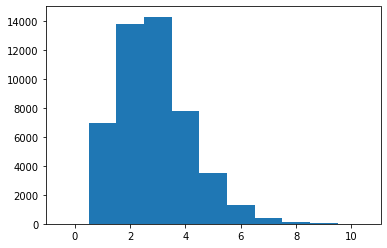

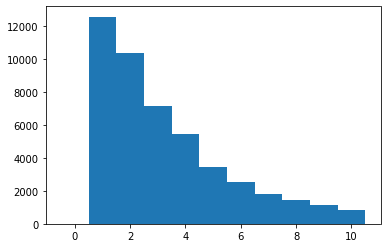

In [ ]:
_=plt.hist(num_genres, bins=(np.arange(0,12)-0.5))
plt.show()
_=plt.hist(num_cat, bins=(np.arange(0,12)-0.5))

how many different genres and categories there are

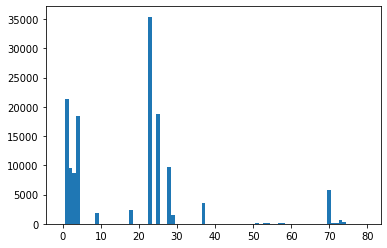

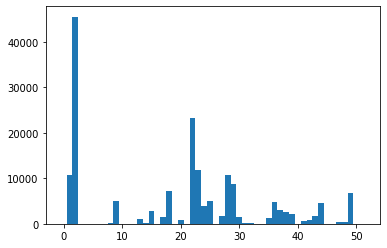

In [ ]:
_=plt.hist(genres, bins=(np.arange(0,81)-0.5))
plt.show()
_=plt.hist(cat, bins=(np.arange(0,53)-0.5))

In [ ]:
diff_cat = set(cat)
diff_genres = set(genres)

In [ ]:
print(diff_cat)
print(len(diff_cat))
print(diff_genres)
print(len(diff_genres))

{1, 2, 6, 8, 9, 13, 14, 15, 16, 17, 18, 19, 20, 22, 23, 24, 25, 27, 28, 29, 30, 31, 32, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 47, 48, 49, 51}
37
{1, 2, 3, 4, 9, 18, 23, 25, 28, 29, 37, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 70, 71, 72, 73, 74, 80, 81, 82, 83, 84, 85}
33
